# Logistic Regression

We will learn how to build a multi-classification logistic regression model. We will use this model to predict `species` of a flower using the iris dataset.

## Overview: 
1. Import the dataset
2. Separate the dataset's features from target variable
3. Split data into training and testing sets
4. Make a pipeline 
5. Make a hyper-parameter dictionary
6. Perform a cross validaton grid search using the training set, and setting the following parameters of the `GridSearchCV` object initialization:

  - `estimator` parameter will be assigned with the `pipeline` object instance as its argument
  - `param_grid` parameter will be assigned with the `hyper-parameter-dictionary` instance

7. Identify best performing model using the training set with specific hyper-parameters set
8. Evaluate the best performing model using the testing data

<hr>

<br>

## Import Required Libraries

**Note:** You can tell the difference between a class and a function by the case sensivity. 

- A **class** will be captialized
- A **function** will be lowercase
- A **method**, or a function belonging to a class, will also be lowercase. You can call a method by invoking it through an instance of a class (instance method), or through a class definition (static method)

References: 
- [Understanding what a class is](https://www.hackerearth.com/practice/python/object-oriented-programming/classes-and-objects-i/tutorial/)
- [Differences between functions and methods](https://www.tutorialspoint.com/difference-between-method-and-function-in-python)
- [Different types of methods](https://www.bogotobogo.com/python/python_differences_between_static_method_and_class_method_instance_method.php)

In [0]:
# Collection libraries 
import numpy as np
import pandas as pd

# Visual libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Helper for splitting training and testing data
from sklearn.model_selection import train_test_split

# Model/Estimator
from sklearn.linear_model import LogisticRegression

# Helper for pipelines
from sklearn.pipeline import make_pipeline

# Helper for normailizing dataset
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

#### Notes about imports with this notebook:
We will re-import some of the libraries when we use these modules, this is to get you used to importing and understanding their classes and functions. Reference the documentation to understand the libraries classes, methods, and functions. 

## Load Data

<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/machine-learning/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science\ Track/machine-learning

<hr> 
<br>

### Import The Iris Dataset
Read in the iris dataset using the path provided and store it in a variable called `df`.

#### Import the cleaned real estate dataset
- Use pandas' `read_csv` function

#### Pandas' `read_csv` parameters:
- `filepath_or_buffer` (string): path of csv to import

```python 
filepath_or_buffer = './data/Iris.csv'
```

### Show Head Of Datset

### Show Tail Of Dataset

<hr> 

<br>

## Separate the dataset's features from the target variable

**Tasks:**
- Print shape of original DataFrame before manipulating the DataFrame
- Create a new DataFrame called `X` to contain only the features 
- Create a new DataFrame called `y` to contain only the labels

<br>

### Question: 
Why would you split the data this way?



Answer:

We will do this to separate the features of the dataset from the target value. For our problem we will set the `tx_price` as the target variable for this machine learning model, because we want to predict the house price based on a selected amount of other features of the dataset.     

<br>

### Print Shape Of Original DataFrame
We will do this to confirm our manipulations later


### Create A DataFrame Called `X` To Hold All The Features
**Note:** `X` is uppercase because it's a 2D array / matrix. A matrix holds multiple rows and more than one column. 

**Tip:** Consider using the DataFrame's `drop` method to create this new DataFrame


#### DataFrame's `drop` method parameters:
- `labels` (string or list of strings): index or a  column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.



#### Show Shape of `X` to make sure we created the features DataFrame correctly:

It should have 150 rows and 4 columns

### Print Head Of Features Matrix `X`

### Create A Series Called `y` To Hold All The Labels

The target variable is `species`.

**Note:** `y` is lowercase because it's Series, meaning it holds multiple rows and only one column per row.



#### Show Shape of `y` to make sure we created the target series correctly:

It should have 150 rows and 1 column

**Note:** the shape will print out like this, `(150,)` which means that is has 150 rows and 1 column.

### Print Head Of Label Series `y`

<hr>
<br>

## Split Data Into Training And Testing 

Even though we will perform cross validation in the near future we will still want to split the dataset in to a training and testing set. We do this so that after we find the best estimator, or best fitted model, through utilizing the training data with a specific hyper-parameters values, we can evaluate the model using unseen testing data. This will allow us to understand if the model is overfitting or underfitting. 

Additional Resources:
- [Learn more about overfitting and underfitting](https://github.com/SoftStackFactory/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)
- [Interested in how to better fit a model?](https://github.com/SoftStackFactory/PythonDataScienceHandbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb)

Note: The second resource is very informative about feature engineering, but we specifically want to emphasize the **Derived Features** section. 

<br>

#### Split Data Into Training And Testing Sets Using The `train_test_split` Function
 
Requirements: 
- pass in `0.20` as the argument for the `test_size` parameter
- pass in `1` as the argument for the `random_state` parameter

**Note:** We set the `random_state` parameter to a unique argument value so that when we run this notebook multiple times or using different computers we will recieve the same split of data, which is important for re-running experiments and simulations.

[`train_test_split` function documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Import `train_test_split` Function From Sklearn's Library

In [0]:
# Helper for splitting training and testing sets


#### Split Data Into Training And Testing Sets 

<hr>

<br>

## Cross Validation Recap
One disadvantage of using a holdout set, or in other words a static split of data for model validation is that we have lost a portion of our data to the model training. In this case some of the dataset would not contribute to the training of the model, saying we don't use cross validation and stick with splitting the data only once. This is not optimal, and can cause problems – especially if the initial set of training data is small.

We will be using cross validation in conjunction to splitting the data using the `train_test_spit` function. We will do this so that we are not training and testing our model's evaluation with the same data, meaning we will eventually want to have our model get scored using unseen data to get a feel for how the model is performing.

<br>

### Perform A Cross Validation Grid Search 
A Grid Search Cross Validation is an exhaustive search over specified hyper-parameter values to find the most performant estimator with a specific hyper-parameter set. 

<br>

#### To perform a cross validation grid search on each machine learning algorithm we need to construct the following:
- Pipeline object, one for each algorithm 
- Model hyper-parameter dictionary, one for each algorithm

<br>

Think of a Pipeline object as production line of transforming `features`, or X DataFrame, before eventually fitting the model. It's important to know that each argument of the pipeline, each transformer object, that will transform the `features` data, must have the following methods implemented:
- `fit()` 
- `fit_transform()`

<br>

In summary the pipeline will pre-process any `features` data provided to it before fitting the model. We will accomplish this by calling the first parameter's `fit_transform` method. The output of the first object's `fit_transform` method will be passed automatically to the next parameter's `fit_transform` method, and so on. Eventually the output of the last transformer object's `fit_transform` method will be passed to the `fit()` method of the estimator object.

#### Rundown of what is conceptually happening:

``` python 
def process_of_pipeline(self, Features, labels):
  Features_transformed = Features
  for name, transformer_object: in self.steps[:-1]:
    Features_transformed = transformer_object.fit_transform(Features_transformed, labels)
  estimator = self.steps[-1][1]
  estimator.fit(Features_transformed, labels) # The last step is the estimator, fit the model after all the transformation operations are complete
```

**Note:** `Features` is capitalized because it's a 2D Matrix, which can interchangably be refered to as a DataFrame, or many rows of data each containing multiple columns of data points. While `labels` should be thought of as a Series, because each row only has one column to hold a singular data point.


[For a better understanding check out this video](https://www.youtube.com/watch?v=6zk6uQSuXqs)

[`GridSearchCV` Class's Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<br>

### Make a Pipeline

We will start by tranforming the `features` matrix data using the `StandardScalar` object's `fit_transform()` method, which will normalize all of the data. We will then pass the transformed `features` matrix into the estimator's `fit` method along with the unmodified `labels` series as parameters.


### Import The Following Libraries From Sklearn's Library
- `make_pipeline` function, which will help us create a pipeline object
- `LogisticRegression` estimator class 
- `StandardScalar` class, which will normalize the dataset


**Remember:** You can tell the difference between a class and a function by the case sensivity

- A **class** will be captialized
- A **function** will be lowercase

In [0]:
# Helper for pipelines


# Model/Estimator


# Helper for normailizing dataset


### Create the Pipeline

#### Using the `make_pipeline()` function:
- Pass in an instanciated `StandardScalar` object as the first argument
- Pass in  an instanciated `LogisticRegression` object as the second argument

**Note:** Both the `StandardScalar` and `LogisticRegression` object will be instanciated with no parameters being passed into their constructor function

<br>

### Make A Hyper-Parameter Dictionary

**Hint:**
You can find out what hyper-parameters an estimator has by using the pipeline object's `get_params` method. This will return a dictionary. 

#### Understanding A Dictionary
A `dictionary` is an unordered collection of data values, used to store data values like a map, which unlike other Data Types that hold only single value as an element, a dictionary holds `key:value` pair. A dictionary has a `key`, and each key maps to a `unique value`. A dictionary is useful when you are trying locate a specific value based on a key in a collection, opposed to iterating over an array/list to get to find specific value. Picture that you have to cycle through a really long list of items just to find the one you were looking for. Is cycling through all those items really necessary? Technically speaking cycling through a list takes longer time and more computer performance, something we need to be mindful of when working with machine learning with big data. A dictionary allows us to quickly access a value based on a unique key, without having to iterate, or cycle, through all elements in this collection.

It's a good time to mention that values of dictionaries can be dictionaries themselves. 

[Dictionary reference](https://www.geeksforgeeks.org/python-dictionary/)

<br>

#### To view the pipeline dictionary, print the dictionary using the pipeline object's `get_params` method: 
```python
# pipeline dicitonary
pipeline.get_params()
```

In [0]:
# pipeline dicitonary



#### Invoke the `keys` method on the pipeline dictionary to view all of the pipeline's parameter names

```python
# pipeline dictionary keys
pipeline.get_params().keys()
```

#### To view all the parameter values of the pipeline dictionary, print the invocation of the pipeline dictionary's `values` method:

#### We will invoke the `values()` method on the pipeline dictionary to view all the parameter values
```python
# pipeline dicitonary values
pipeline.get_params().values()
```

### Create A Dictionary To Hold The Different Hyper-Parameters For An Indvidual Estimator

For this dictionary:
- The `keys` will be a unique estimator hyper-parameter name
- The `values` will be arrays, filled with multiple unique values for that specific hyper-parameter

#### <span style="color:red"> Important Note: </span>
When creating an estimator's hyper-parameter dictionary we need to make sure we are using the pipeline object's dictionary `keys`, not the actual estimator object's dictionary `keys` **i.e.** `LogisticRegression()`. 
 
##### Don't Do:

<del>

```python 
# Do not use the actual estimator object's keys
LogisticRegression().get_params().keys()

hyper_parameter_dict = {
  'fit_intercept': [True, False] # When we fit, an error
}
```

</del>

When we perform fitting the model with the following hyper-parameters we will get the following error if we do not use the proper hyper-parameter names:

```ValueError: Invalid parameter fit_intercept for estimator Pipeline```

This is because we need to use the pipeline's hyper-parameters naming convention instead: 

```python 
# Get Pipeline's hyper-parameter options instead due to naming conventions sklearn follows
pipeline.get_params().keys()

# Use Pipeline's hyper-parameter options instead due to the naming conventions sklearn follows
hyper_parameter_dict = {
    'logisticregression__fit_intercept': [True, False],
}


In [0]:
# Use Pipeline's hyper-parameter options instead due to the naming conventions sklearn follows


### Perform A Cross Validation Grid Search
Now that we have a pipeline and an estimator's hyper-parameter dictionary we can perform a cross validation grid search. This is the preparation step for finding the best estimator with a specific hyper-parameters set.



### Import `GridSearchCv` Class From Sklearn's Library

In [0]:
# Helper for cross-validation


### Build The GridSearchCV Object 

#### Set the following parameters of the `GridSearchCV` object initialization:
- `estimator` parameter will be assigned with the `pipeline` object instance as its argument
- `param_grid` parameter will be assigned with the `hyper-parameter-dictionary` instance
- `return_train_score` parameter will be assigned with the value `True`
- `refit` parameter will be assigned with the value `True`
- `n_jobs` parameter will be assigned the value `-1` to use all available cpu power

[`GridSearchCV` Class's Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


<br>

#### **Note:** The data type of the model instance is of type GridSearchCv

### Use pythons built in `type()` function passing in the model instance to print the type 

<br>

### Fit Model to Training Data
We will now fit an estimator/model. We will do this so that we can use the fitted model to predict the values to which unseen samples belong.
This is the training/learning aspect of the model as well as where the pipeline process comes alive!

<hr>

## Evaluate Model


### Highest Performing Model Score
We will now find out how well the highest performing model with a specific hyper-parameter value set performs.

Use the `GridSearchCV` class's `score` method using the training data. 

**Note:** The reason why we can train and evaluate with the same data is because we are performing cross validation. 

This `score` method will use the best estimator's scoring function, in our case the **r^2** score because we are using a LogisticRegression estimator.

Refrences:
- [`GridSearchCV` class's `score` method documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.score)
- [`LogisticRegression` class's `score` method documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score)

### Mean Performing Score
Print the `GridSearchCV` object's `best_score_` attribute to see the mean cross-validated score using the best_estimator

Todo: Confirm if `GridSearchCv.best_score_` is using the GridSearchCv.best_estimator to perform the cross validation.

# Store the Best Fitted Estimator

Assign a new variable named `best_estimator` with the GridSearchCV object's `best_estimator_` attribute

**Remember:** `best_estimator_` is actually a `Pipeline` object

<br>

### Question
What can we conclude from looking at the best_estimator's set hyperparameters?

### Answer:
The most performant model will have the value `True` for the `fit_intercept` hyper-parameter.

<br>

#### Important note: 
The `best_estimator`'s hyper-parameter values were specifically chosen because of the data it was trained on. If you manipulate the data and then re-fit the model we might notice different values.  


<hr>

<br>

### Evaluate the best performing model using the testing data

**Remember:** `best_estimator_` is actually a `Pipeline` object. 

<br>

### <span style="color:red">**It's really important to always understand the type of object you are working with, use that object's documentation to guide you in the right direction** </span>

<hr>

# Make Predictions
Now that we have a fitted model we can now make a prediction using the testing set.

Make predictions using the first five observations of the testing data.

### Compare Predictions To The True Values

#### What else can you do to boost the model performance?

Iterate:
- Exploratory analysis
- Data cleaning 
- Feature engineering
- Get More Data

## Confusion Matrix and Classification Report 

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize=fontsize*1.5)
    plt.xlabel('Predicted label',fontsize=fontsize*1.5)
    
    # Fix the heatmap being cut off
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    return fig

In [0]:
confusion_matrix(y_test, y_test_predictions)

In [0]:
cm = confusion_matrix(y_test, y_test_predictions )

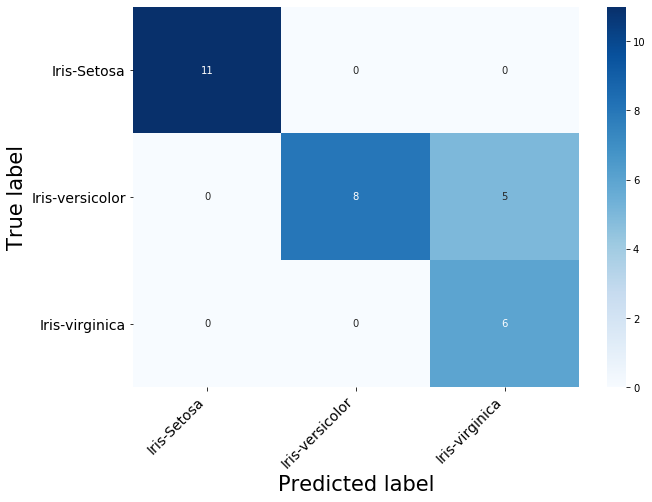

In [0]:
_ = print_confusion_matrix(confusion_matrix=cm, class_names=['Iris-Setosa', 'Iris-versicolor', 'Iris-virginica'])

In [0]:
print(classification_report(y_test, y_test_predictions))

<br>

## Feature Importances

In [0]:
#col_names = X_train.columns

In [0]:
#col_importances = best_estimator.steps[1][1].feature_importances_


In [0]:
#pd.Series(index=col_names, data=col_importances).sort_values(ascending=False)